In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import emcee
import sys
%matplotlib inline

In this excercise you'll get to apply emcee to fit a synthetic binary light curve generated with Phoebe.

Let's first initialize the Bundle and set all the relevant parameters to generate the synthetic light curve.

In [2]:
b = phoebe.default_binary()

In [3]:
b['period@orbit'] = 0.5
b['sma@orbit'] = 3.5
b['incl@orbit'] = 83.5
b['requiv@primary'] = 1.2
b['requiv@secondary'] = 0.8
b['teff@primary'] = 6500.
b['teff@secondary'] = 5500.

In [4]:
b.add_dataset('lc', times=np.linspace(0, 0.5, 51))

<ParameterSet: 19 parameters | contexts: dataset, compute, constraint>

In [5]:
b.run_compute()

<ParameterSet: 2 parameters | qualifiers: times, fluxes>

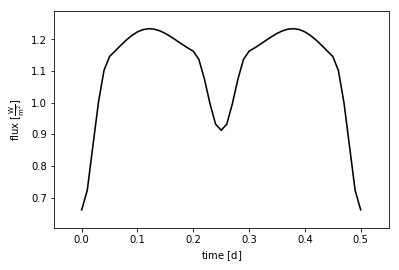

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 432x288 with 1 Axes>)

In [8]:
b.plot(show=True)

In [9]:
np.savetxt('data.lc', 
           np.vstack((b['value@times@lc01@model'], b['value@fluxes@lc01@model']+np.random.normal(0, 0.01, 51))).T)

Now our synthetic light curve (with some added scatter) has been saved to a file 'data.lc' and can be used as our "observed" light curve to fit.

### Exercise

1. Initialize a new Bundle and load the 'data.lc' file into an LC dataset. 
2. Set the values of the period, sma and primary teff as given above:
   - period = 0.5 d
   - sma = 3.5 solRad
   - teff1 = 6500 K
3. Sample the values of the inclination, equivalent radii and secondary teff following the guidelines provided in the fitting tutorial. 

For the purposes of this exercise, let's assume that you've used an external optimizer and already know that the values of the modeled parameters are: 
- incl ~ 83-84 deg
- r1 ~ 1.15-1.25
- r2 ~ 0.75 - 0.85
- teff2 ~ 5450-5550

*For better results, confine the initial distributions to the values given above. Time permitting, redo with different (narrower/broader) initial distributions and compare the results.*

*Try to limit the number of walkers to <50 and number of iterations to <20 to avoid long compute times (32 walkers + 10 iterations take about 10 min to compute on a single processor).*